In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Importing machine learning models and evaluation metrics
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
# For Hyperparameter Tuning
from scipy.stats import uniform, randint

In [2]:
data = pd.read_csv("/content/DataPreprocessing.csv")

data

,race,gender,age,num_procedures,num_medications,number_emergency,number_inpatient,max_glu_serum,A1Cresult,insulin,...,time_diagnoses_interaction,diag_1_category,diag_2_category,diag_3_category,sulfonylureas,biguanides,thiazolidinediones,meglitinides,alpha_glucosidase_inhibitors,other_combination_therapies
0,2,0,20.0,0,-1.752413,0,0.0,2,2,1.0,...,1.0,3,1,1,0.0,0,0,0,0,0
1,2,0,20.0,0,0.332867,0,0.0,2,2,3.0,...,27.0,3,1,1,0.0,0,0,0,0,0
2,2,0,20.0,5,-0.280451,0,1.0,2,2,1.0,...,12.0,3,1,6,1.0,0,0,0,0,0
3,2,1,30.0,1,0.087540,0,0.0,2,2,3.0,...,14.0,3,1,3,0.0,0,0,0,0,0
4,2,1,40.0,0,-0.893768,0,0.0,2,2,2.0,...,5.0,3,0,1,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12752,2,1,20.0,0,-1.629749,0,2.5,2,2,2.0,...,4.0,3,1,3,0.0,0,0,0,0,0
12753,2,0,70.0,1,-0.893768,0,0.0,2,2,2.0,...,27.0,3,3,3,0.0,0,0,0,0,0
12754,2,0,70.0,3,0.455530,0,0.0,2,2,1.0,...,50.0,3,3,1,0.0,0,0,0,0,0
12755,2,0,70.0,5,1.314174,0,0.0,2,2,1.0,...,36.0,3,4,4,1.0,0,0,0,0,0


In [3]:
data.shape

(12757, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12757 entries, 0 to 12756
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   race                          12757 non-null  int64  
 1   gender                        12757 non-null  int64  
 2   age                           12757 non-null  float64
 3   num_procedures                12757 non-null  int64  
 4   num_medications               12757 non-null  float64
 5   number_emergency              12757 non-null  int64  
 6   number_inpatient              12757 non-null  float64
 7   max_glu_serum                 12757 non-null  int64  
 8   A1Cresult                     12757 non-null  int64  
 9   insulin                       12757 non-null  float64
 10  change                        12757 non-null  int64  
 11  diabetesMed                   12757 non-null  int64  
 12  encoded_readmitted            12756 non-null  float64
 13  t

In [5]:
data['diabetesMed'].value_counts()
# حذف الصفوف التي تحتوي على القيمة '2' في عمود 'diabetesMed'
data = data[data['diabetesMed'] != 2]

# التحقق من توزيع القيم في عمود 'diabetesMed'
print(data['diabetesMed'].value_counts())


diabetesMed
1    9386
0    3370
Name: count, dtype: int64


In [6]:
data.isnull().sum()

,0
race,0
gender,0
age,0
num_procedures,0
num_medications,0
number_emergency,0
number_inpatient,0
max_glu_serum,0
A1Cresult,0
insulin,0


In [7]:
data.drop_duplicates(inplace=True)


<ipython-input-7-515f69ef7765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


**train_test_spilt**


In [8]:
# تقسيم البيانات إلى مدخلات (X) وهدف (y)
X = data.drop(columns=['diabetesMed'])  # استبعاد العمود المستهدف
y = data['diabetesMed']  # الهدف

# تقسيم البيانات إلى بيانات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (10156, 22)
Shape of X_test: (2540, 22)
Shape of y_train: (10156,)
Shape of y_test: (2540,)


**Models**

**1. logistic_regression**


Logistic Regression Accuracy: 0.9260
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       637
           1       1.00      0.90      0.95      1903

    accuracy                           0.93      2540
   macro avg       0.89      0.95      0.91      2540
weighted avg       0.94      0.93      0.93      2540



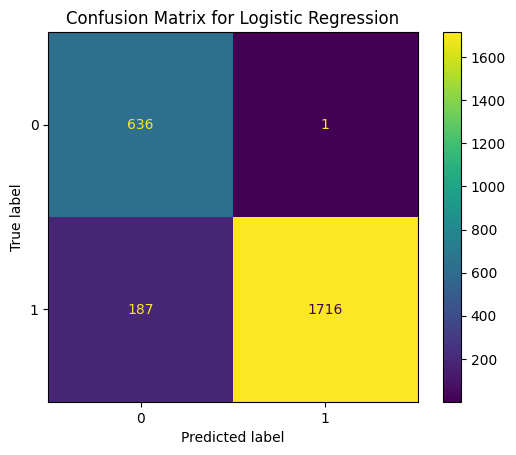

In [9]:
# تدريب نموذج Logistic Regression
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# توقعات النموذج
y_pred1 = logistic_regression_model.predict(X_test)

# حساب الدقة والتقرير
accuracy_logistic = accuracy_score(y_test, y_pred1)
report_logistic = classification_report(y_test, y_pred1, zero_division=1)

# طباعة النتائج
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print(f"Logistic Regression Classification Report:\n{report_logistic}")

# رسم مصفوفة الالتباس لنموذج Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred1)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
disp_logistic.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


**2. SVM**

SVM Accuracy: 0.9260
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       637
           1       1.00      0.90      0.95      1903

    accuracy                           0.93      2540
   macro avg       0.89      0.95      0.91      2540
weighted avg       0.94      0.93      0.93      2540



<Figure size 640x480 with 0 Axes>

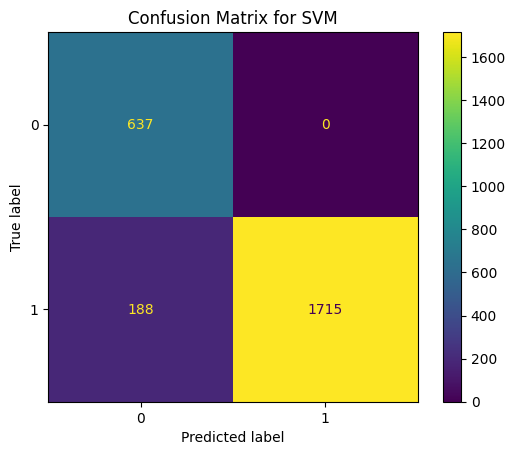

In [10]:

# 1- Scaling البيانات
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2- بناء موديل SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)

# 3- التوقع
y_pred2 = svm.predict(X_test_scaled)

# حساب الدقة والتقرير
accuracy = accuracy_score(y_test, y_pred2)
report = classification_report(y_test, y_pred2, zero_division=1)

# طباعة الدقة والتقرير
print(f"SVM Accuracy: {accuracy:.4f}")
print(f"SVM Classification Report:\n{report}")

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for SVM")
plt.show()



**3. Naive Bayes**


Training Naive Bayes...
Naive Bayes Accuracy: 0.9260
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       637
           1       1.00      0.90      0.95      1903

    accuracy                           0.93      2540
   macro avg       0.89      0.95      0.91      2540
weighted avg       0.94      0.93      0.93      2540



<Figure size 640x480 with 0 Axes>

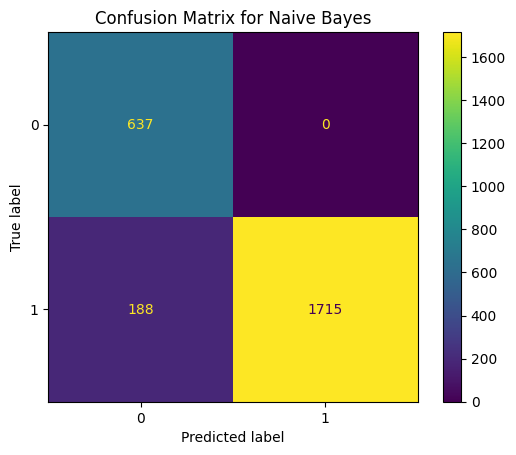

In [11]:
# تعريف موديل Naive Bayes
model = GaussianNB()

# تدريب الموديل
print("\nTraining Naive Bayes...")
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

# حساب الدقة والتقرير
accuracy = accuracy_score(y_test, y_pred3)
report = classification_report(y_test, y_pred3, zero_division=1)

# طباعة الدقة والتقرير
print(f"Naive Bayes Accuracy: {accuracy:.4f}")
print(f"Naive Bayes Classification Report:\n{report}")

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for Naive Bayes")
plt.show()


**4. GradientBoostingClassifier**

Accuracy: 92.64%


<Figure size 640x480 with 0 Axes>

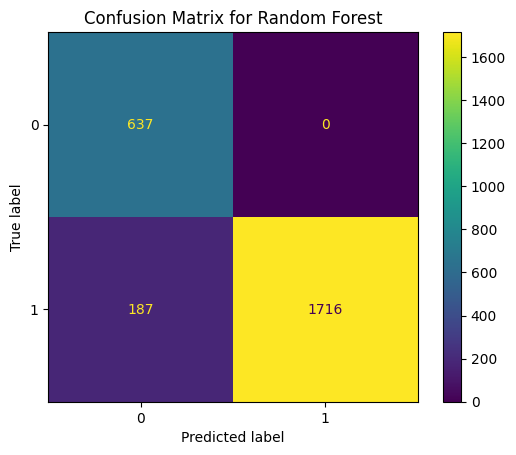

In [12]:
# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred4 = gb_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred4)
print(f'Accuracy: {accuracy * 100:.2f}%')
# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()



**5. Random Forest**


Training Random Forest...
Random Forest Accuracy: 0.9240
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       637
           1       0.99      0.90      0.95      1903

    accuracy                           0.92      2540
   macro avg       0.88      0.94      0.91      2540
weighted avg       0.94      0.92      0.93      2540



<Figure size 640x480 with 0 Axes>

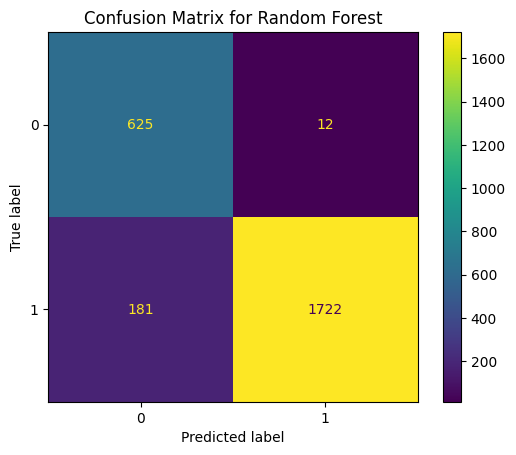

In [13]:

# تعريف موديل Random Forest
model = RandomForestClassifier(random_state=42)

# تدريب الموديل
print("\nTraining Random Forest...")
model.fit(X_train, y_train)
y_pred5 = model.predict(X_test)

# حساب الدقة والتقرير
accuracy = accuracy_score(y_test, y_pred5)
report = classification_report(y_test, y_pred5, zero_division=1)

# طباعة الدقة والتقرير
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest Classification Report:\n{report}")

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()


**6. XGBoost**


Training XGBoost...
XGBoost Accuracy: 0.9244
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       637
           1       0.99      0.91      0.95      1903

    accuracy                           0.92      2540
   macro avg       0.89      0.94      0.91      2540
weighted avg       0.94      0.92      0.93      2540



<Figure size 640x480 with 0 Axes>

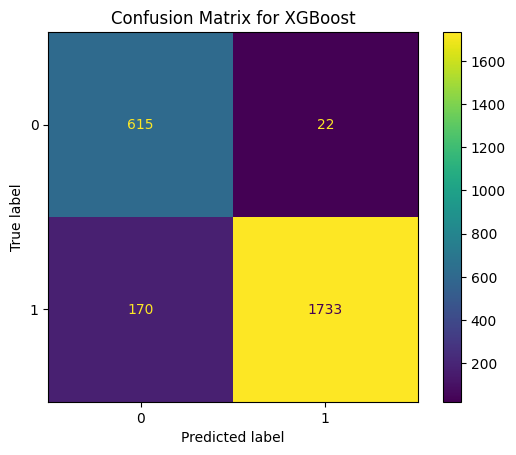

In [14]:

# تعريف موديل XGBoost
model = XGBClassifier(random_state=42)

# تدريب الموديل
print("\nTraining XGBoost...")
model.fit(X_train, y_train)
y_pred6 = model.predict(X_test)

# حساب الدقة والتقرير
accuracy = accuracy_score(y_test, y_pred6)
report = classification_report(y_test, y_pred6, zero_division=1)

# طباعة الدقة والتقرير
print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"XGBoost Classification Report:\n{report}")

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred6)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for XGBoost")
plt.show()


**7. Decision Tree**


Training Decision Tree...
Decision Tree Accuracy: 0.8945
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       637
           1       0.93      0.93      0.93      1903

    accuracy                           0.89      2540
   macro avg       0.86      0.86      0.86      2540
weighted avg       0.89      0.89      0.89      2540



<Figure size 640x480 with 0 Axes>

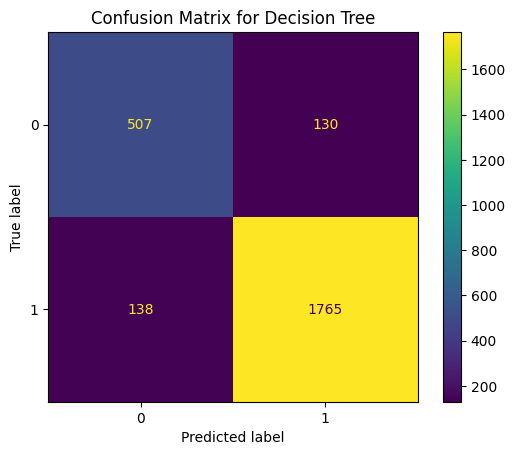

In [15]:

# تعريف موديل Decision Tree
model = DecisionTreeClassifier(random_state=42)

# تدريب الموديل
print("\nTraining Decision Tree...")
model.fit(X_train, y_train)
y_pred7 = model.predict(X_test)

# حساب الدقة والتقرير
accuracy = accuracy_score(y_test, y_pred7)
report = classification_report(y_test, y_pred7, zero_division=1)

# طباعة الدقة والتقرير
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(f"Decision Tree Classification Report:\n{report}")

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred7)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for Decision Tree")
plt.show()


**8.KNN**


Training KNN...
KNN Accuracy: 0.7370
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.45      0.46       637
           1       0.82      0.83      0.83      1903

    accuracy                           0.74      2540
   macro avg       0.65      0.64      0.64      2540
weighted avg       0.73      0.74      0.73      2540



<Figure size 640x480 with 0 Axes>

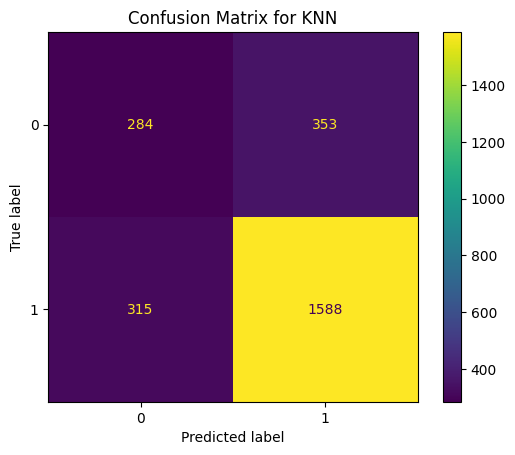

In [16]:
# تعريف موديل KNN
model = KNeighborsClassifier()

# تدريب الموديل
print("\nTraining KNN...")
model.fit(X_train, y_train)
y_pred8 = model.predict(X_test)

# حساب الدقة والتقرير
accuracy = accuracy_score(y_test, y_pred8)
report = classification_report(y_test, y_pred8, zero_division=1)

# طباعة الدقة والتقرير
print(f"KNN Accuracy: {accuracy:.4f}")
print(f"KNN Classification Report:\n{report}")

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred8)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for KNN")
plt.show()


**COMPAREZATION**

In [17]:
models = ['Logistic Regression','SVM',"Naive Bayes",'GradientBoostingClassifier','Random Forest' ,'XGBoost','Decision Tree', 'KNN']
accuracies = [accuracy_score(y_test, y_pred1),
              accuracy_score(y_test, y_pred2),
              accuracy_score(y_test, y_pred3),
              accuracy_score(y_test, y_pred4),
              accuracy_score(y_test, y_pred5),
              accuracy_score(y_test, y_pred6),
              accuracy_score(y_test, y_pred7),
              accuracy_score(y_test, y_pred8)]

for model, score in zip(models, accuracies):
    print(f"{model:<20} | Accuracy: {score:.4f}")



Logistic Regression  | Accuracy: 0.9260
SVM                  | Accuracy: 0.9260
Naive Bayes          | Accuracy: 0.9260
GradientBoostingClassifier | Accuracy: 0.9264
Random Forest        | Accuracy: 0.9240
XGBoost              | Accuracy: 0.9244
Decision Tree        | Accuracy: 0.8945
KNN                  | Accuracy: 0.7370


In [18]:
# Print each model with its accuracy
print("Models Performance:\n")
for model, score in zip(models, accuracies):
    print(f"{model} => Accuracy: {score:.4f}")

# Select the Best Model Automatically
best_index = accuracies.index(max(accuracies))
best_model = models[best_index]
best_accuracy = accuracies[best_index]

print("\nThe Best Model is:", best_model)
print("With Accuracy:", best_accuracy)

# Create DataFrame for Visualization
results = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display results as a table
print("\nModels Accuracy Table:")
print(results)


Models Performance:

Logistic Regression => Accuracy: 0.9260
SVM => Accuracy: 0.9260
Naive Bayes => Accuracy: 0.9260
GradientBoostingClassifier => Accuracy: 0.9264
Random Forest => Accuracy: 0.9240
XGBoost => Accuracy: 0.9244
Decision Tree => Accuracy: 0.8945
KNN => Accuracy: 0.7370

The Best Model is: GradientBoostingClassifier
With Accuracy: 0.9263779527559055

Models Accuracy Table:
                        Model  Accuracy
0  GradientBoostingClassifier  0.926378
1         Logistic Regression  0.925984
2                         SVM  0.925984
3                 Naive Bayes  0.925984
4                     XGBoost  0.924409
5               Random Forest  0.924016
6               Decision Tree  0.894488
7                         KNN  0.737008


<ipython-input-19-7096418104ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results, palette='Set1')


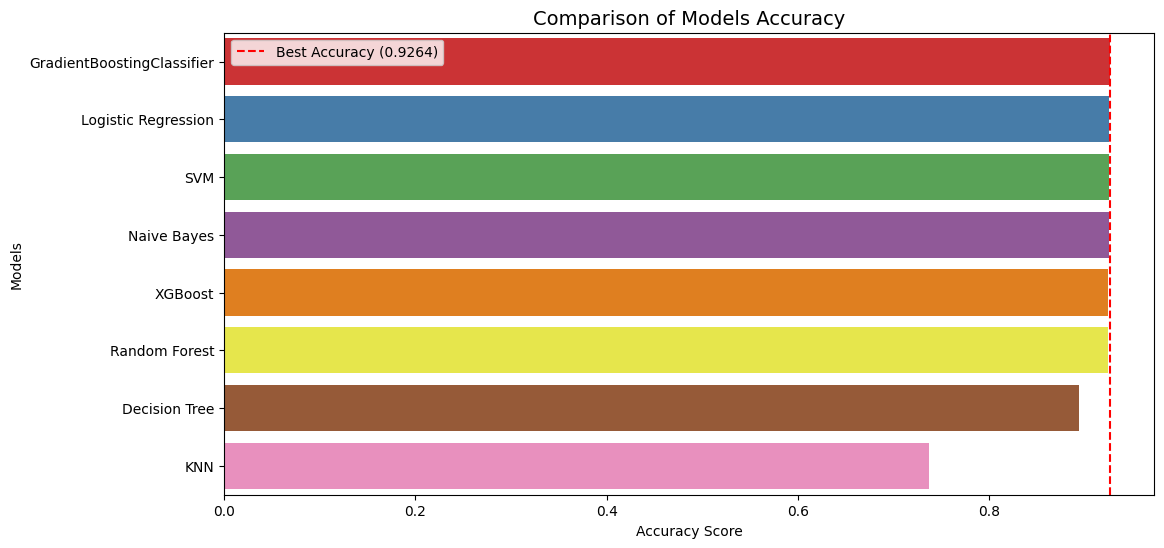

In [19]:

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x='Accuracy', y='Model', data=results, palette='Set1')
plt.title('Comparison of Models Accuracy', fontsize=14)
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.axvline(best_accuracy, color='red', linestyle='--', label=f'Best Accuracy ({best_accuracy:.4f})')
plt.legend()
plt.show()


**Hyperparameters Tuning**

**1. Hyperparameter Tuning for Logistic Regression**

In [20]:
# Define the model
model = LogisticRegression(solver='liblinear')

# Define the hyperparameter space
param_dist = {
    'C': uniform(0.01, 10),  # Randomly select C between 0.01 and 10
    'penalty': ['l1', 'l2'],  # L1 or L2 penalty
    'max_iter': [100, 200, 300, 400],  # Number of iterations
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_:.4f}")


Best Parameters: {'C': np.float64(0.2641912674409519), 'max_iter': 100, 'penalty': 'l1'}
Best Score: 0.9409


**2. Hyperparameter Tuning for SVM**

In [21]:
# Define the model
model = SVC()

# Define the parameter grid with a smaller range
param_grid = {
    'C': [1, 10],  # Reduce the range of C
    'kernel': ['linear', 'rbf'],  # Only use 'linear' and 'rbf' kernels
    'gamma': ['scale', 'auto'],  # Use predefined options for gamma
    'class_weight': [None, 'balanced']  # Class weights
}

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9407


**3. Hyperparameter Tuning for Naive Bayes**

In [22]:
# Define the model
model = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Smoothing parameter
}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")


Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.9407



**4. Hyperparameter Tuning for GradientBoostingClassifier**


In [23]:
# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'subsample': [0.8, 0.9, 1.0]  # Proportion of the data used for each tree
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the GridSearch model
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Predict using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 150, 'subsample': 1.0}
Accuracy: 92.56%


**5. Hyperparameter Tuning for Random Forest**

In [24]:
# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9408


**6. Hyperparameter Tuning for XGBoost**

In [25]:
# Define the model
model = XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 6, 10],  # Maximum depth of trees
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio
    'colsample_bytree': [0.8, 0.9, 1.0]  # Subsample ratio of features
}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Best Score: 0.9408


**7. Hyperparameter Tuning for Decision Tree**

In [26]:
# Define the model
model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.9380


**8. Hyperparameter Tuning for KNN**

In [27]:
# Define the model
model = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.8077


**Model Performance Comparison and Evaluation with Hyperparameter Tuning**

                                                                Params   Score
Logistic Regression     {'C': 0.264, 'max_iter': 100, 'penalty': 'l1'}  0.9409
Random Forest        {'max_depth': 10, 'min_leaf': 4, 'min_split': ...  0.9408
XGBoost              {'colsample_bytree': 1.0, 'learning_rate': 0.0...  0.9408
SVM                  {'C': 1, 'class_weight': None, 'gamma': 'scale...  0.9407
Naive Bayes                                   {'var_smoothing': 1e-09}  0.9407
Decision Tree        {'criterion': 'entropy', 'max_depth': 10, 'min...   0.938
Gradient Boosting    {'lr': 0.1, 'max_depth': 3, 'min_samples_split...  0.9256
KNN                  {'metric': 'manhattan', 'n_neighbors': 9, 'wei...  0.8077


<ipython-input-28-5b9578a36a02>:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  best_scores = df_performance['Score'].fillna(0)


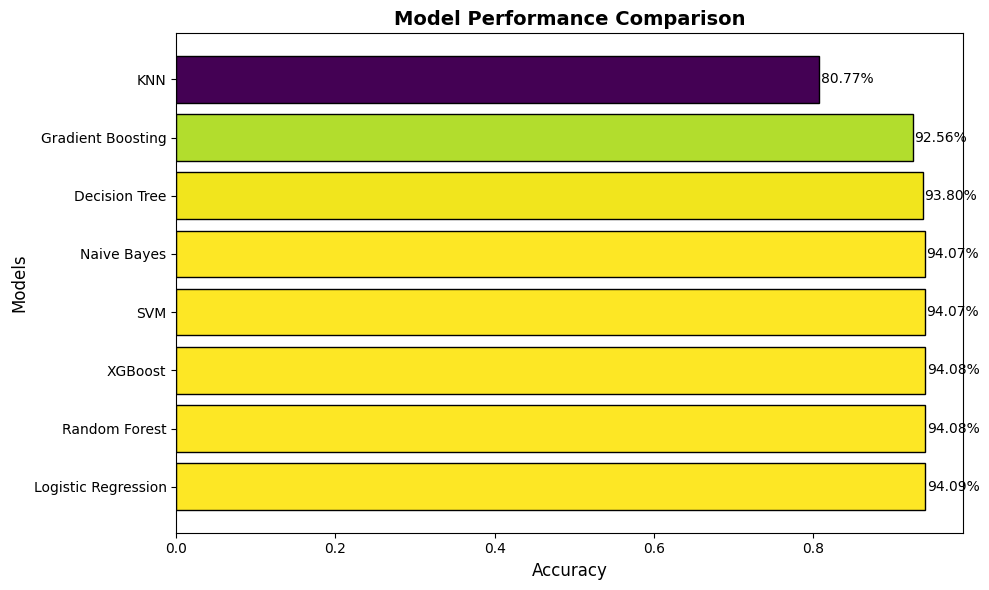


The Best Model after Tuning is: Logistic Regression with Accuracy: 94.09%


In [28]:
# Best parameters and best scores

model_performance = {
    'Logistic Regression': {'Params': {'C': 0.264, 'max_iter': 100, 'penalty': 'l1'}, 'Score': 0.9409},
    'SVM': {'Params': {'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}, 'Score':  0.9407},
    'Naive Bayes': {'Params': {'var_smoothing': 1e-09}, 'Score': 0.9407},
    'Gradient Boosting': {'Params': {'lr': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 150, 'subsample': 1.0}, 'Score': 0.9256},
    'Random Forest': {'Params': {'max_depth': 10, 'min_leaf': 4, 'min_split': 2, 'n_estimators': 50}, 'Score': 0.9408},
    'XGBoost': {'Params': {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}, 'Score':0.9408},
    'Decision Tree': {'Params': {'criterion': 'entropy', 'max_depth': 10, 'min_leaf': 4, 'min_split': 10}, 'Score': 0.938},
    'KNN': {'Params': {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}, 'Score': 0.8077}
}


# Convert to DataFrame for easy comparison
df_performance = pd.DataFrame(model_performance).T
df_performance = df_performance[['Params', 'Score']]
df_performance = df_performance.sort_values(by='Score', ascending=False)

# Print the comparison table
print(df_performance)

# Plotting the best scores for each model with enhanced visualization
plt.figure(figsize=(10, 6))

best_scores = df_performance['Score'].fillna(0)
norm = plt.Normalize(vmin=best_scores.min(), vmax=best_scores.max())
colors = plt.cm.viridis(norm(best_scores))

bars = plt.barh(df_performance.index, best_scores, color=colors, edgecolor='black')

# Adding the accuracy text on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height() / 2, f'{width*100:.2f}%', va='center', ha='left', fontsize=10, color='black')

# Adding titles and labels
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()

# Find the best model
best_model_name = df_performance.index[0]
best_model_score = df_performance['Score'].iloc[0]

print(f"\nThe Best Model after Tuning is: {best_model_name} with Accuracy: {best_model_score * 100:.2f}%")


In [29]:
import joblib
joblib.dump(logistic_regression_model, 'Best_Model.pkl')


['Best_Model.pkl']